In [0]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive
import os
os.chdir("drive/ML/分类/")
!ls

In [0]:
!pip show keras
!pip show tensorflow
!pip show keras-vis

In [0]:
# !pip uninstall keras
!pip uninstall tensorflow
# !pip uninstall keras-vis

In [0]:
!pip install tensorflow==1.12
# !pip install keras==2.2.4
# !pip install git+https://github.com/raghakot/keras-vis.git

In [0]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
images=[]
labels=[]
def read_image(imageName):
    im = Image.open(imageName).convert('RGB')
    data = np.array(im)
    return data

In [0]:
# 读取在words里面有几个文件夹
text = os.listdir('./resize_data')
# 把文件夹里面的图片和其对应的文件夹的名字也就是对应的字
for textPath in text:
    for fn in os.listdir(os.path.join('resize_data', textPath)):
        if fn.endswith('.jpg'):
            fd = os.path.join('./resize_data', textPath, fn)
            images.append(read_image(fd))
            labels.append(textPath)
            
X = np.array(images)
y = np.array(list(map(int, labels))) 

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=30)

In [0]:
# [0],dyed-lifted-polyps
# [1],dyed-resection-margins
# [2],esophagitis
# [3],normal-cecum
# [4],normal-pylorus
# [5],normal-z-line
# [6],polyps
# [7],ulcerative-colitis
plt.imshow(X_train[0])

In [0]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

In [6]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train, 8)
Y_test = np_utils.to_categorical(y_test, 8)

Using TensorFlow backend.


In [0]:
print(Y_train.shape)
print(Y_train.shape)

In [0]:
'''
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPool2D
from keras.utils import np_utils
import numpy as np
 
# 全局变量
batch_size = 128    # 每批次多少样本
nb_classes = 8     # 类别总数
epochs = 50        # 遍历次数
img_rows, img_cols = 224,224
nb_filters = 32         # 卷积个数
pool_size = (2, 2)      # 池化面积大小
kernel_size = (3, 3)    # 卷积核大小

# 卷积神经网络
model = Sequential()
model.add(Convolution2D(nb_filters, (kernel_size[0], kernel_size[1]),
                        padding='same',
                        input_shape=(224,224,3)))   # 卷积层1
model.add(Activation('relu'))
model.add(Convolution2D(nb_filters, (kernel_size[0], kernel_size[1])))  # 卷积层2
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=pool_size))   # 池化层
 
model.add(Convolution2D(nb_filters, (kernel_size[0], kernel_size[1])))  # 卷积层3
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=pool_size))   # 池化层
 
model.add(Convolution2D(nb_filters, (kernel_size[0], kernel_size[1])))  # 卷积层4
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=pool_size))   # 池化层
 
model.add(Flatten())      # 拉成一维数据
model.add(Dense(128))   # 全连接层
model.add(Activation('relu'))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
'''
from keras.applications.vgg16 import VGG16
print('Start build VGG16 -------')
# 获取vgg16的卷积部分，如果要获取整个vgg16网络需要设置:include_top=True
model_vgg16_conv = VGG16(weights='imagenet', include_top=False)
model_vgg16_conv.summary()

from keras.layers import Dense, Activation,Flatten
from keras.models import Model
from keras.layers import Input
from keras.layers import Dropout
from keras.optimizers import SGD

input_shape = (224, 224, 3)

input = Input(input_shape, name = 'image_input')

output_vgg16_conv = model_vgg16_conv(input)
x = Flatten(name='flatten')(output_vgg16_conv)
x = Dense(4096, activation='relu', name='fc1')(x)
x = Dense(512, activation='relu', name='fc2')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu', name='fc3')(x)
x = Dense(8, activation='softmax', name='predictions')(x)
epochs=50
lrate=0.01
decay=lrate/epochs
sgd = SGD(lr=0.01, decay=1e-5)
# 最终创建出自己的vgg16模型
my_model = Model(input=input, output=x)

print('\nThis is my vgg16 model for the task')
my_model.summary()

my_model.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
from keras.applications.vgg16 import VGG16

# 其次加载其他模块
from keras.layers import Input
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.models import Model
from keras.optimizers import SGD

model_vgg = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

for layer in model_vgg.layers:
    layer.trainable = False#别去调整之前的卷积层的参数
model = Flatten(name='flatten')(model_vgg.output)#去掉全连接层，前面都是卷积层
model = Dense(4096, activation='relu', name='fc1')(model)
model = Dense(4096, activation='relu', name='fc2')(model)
model = Dropout(0.5)(model)
model = Dense(8, activation='softmax')(model)
model_vgg16 = Model(inputs=model_vgg.input, outputs=model, name='vgg16')



model_vgg16.summary()

In [0]:
import keras
opt_sgd = keras.optimizers.SGD(
                lr=1e-3
                , decay=1e-9
                , momentum=0.9
                , nesterov=False
            )
model_vgg16.compile(
    loss='categorical_crossentropy'
    , optimizer=opt_sgd
    , metrics=['accuracy']
)

In [0]:
from keras.callbacks import ModelCheckpoint
model_checkpoint = ModelCheckpoint('vgg_16.h5', monitor='loss', verbose=1, save_best_only=True)

In [15]:
print('开始训练')
history=model_vgg16.fit(X_train, Y_train, batch_size=50, epochs=100, verbose=1,
          validation_data=(X_test, Y_test),callbacks=[model_checkpoint])

开始训练
Train on 3200 samples, validate on 800 samples
Epoch 1/100
3200/3200 [==============================] - 26s 8ms/step - loss: 0.5677 - acc: 0.7656 - val_loss: 0.6322 - val_acc: 0.7238

Epoch 00001: loss improved from inf to 0.56774, saving model to vgg_16.h5
Epoch 2/100
3200/3200 [==============================] - 26s 8ms/step - loss: 0.5316 - acc: 0.7859 - val_loss: 0.5949 - val_acc: 0.7463

Epoch 00002: loss improved from 0.56774 to 0.53165, saving model to vgg_16.h5
Epoch 3/100
3200/3200 [==============================] - 26s 8ms/step - loss: 0.4909 - acc: 0.8000 - val_loss: 0.5464 - val_acc: 0.7700

Epoch 00003: loss improved from 0.53165 to 0.49089, saving model to vgg_16.h5
Epoch 4/100
3200/3200 [==============================] - 26s 8ms/step - loss: 0.4791 - acc: 0.8047 - val_loss: 0.5809 - val_acc: 0.7612

Epoch 00004: loss improved from 0.49089 to 0.47910, saving model to vgg_16.h5
Epoch 5/100
3200/3200 [==============================] - 26s 8ms/step - loss: 0.4367 - acc: 

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


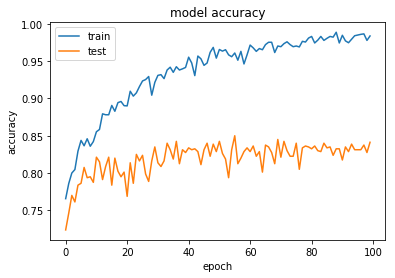

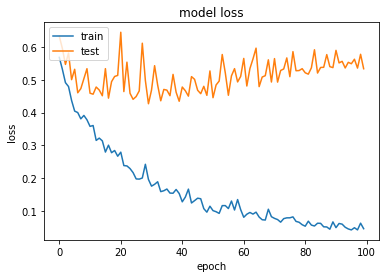

In [16]:
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
# model_vgg16.save('model1.h5')
from keras.models import load_model
model=load_model('model1.h5')


In [0]:
print('开始评估')
scores = model.evaluate(X_test, y_test)
print('Test score:', scores[0])
print('Test accuracy:', scores[1])

In [0]:
model.summary()

In [0]:
from keras.applications import VGG16
from vis.utils import utils
from keras import activations

from vis.utils import utils
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (18,6)

layer_idx = utils.find_layer_idx(model, 'dense_1')

# Swap softmax with linear
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

img1 = utils.load_img('image/1.jpg', target_size=(224, 224))
img2 = utils.load_img('image/2.jpg', target_size=(224, 224))
img3 = utils.load_img('image/3.jpg', target_size=(224, 224))
img4 = utils.load_img('image/4.jpg', target_size=(224, 224))
img5 = utils.load_img('image/5.jpg', target_size=(224, 224))

f,ax=plt.subplots(1,5)
ax[0].imshow(img1)
ax[1].imshow(img2)
ax[2].imshow(img3)
ax[3].imshow(img4)
ax[4].imshow(img5)


In [0]:
img6 = utils.load_img('image/6.jpg', target_size=(224, 224))
img7 = utils.load_img('image/7.jpg', target_size=(224, 224))
img8 = utils.load_img('image/8.jpg', target_size=(224, 224))
img9 = utils.load_img('image/9.jpg', target_size=(224, 224))
img10 = utils.load_img('image/10.jpg', target_size=(224, 224))

f,ax=plt.subplots(1,5)
ax[0].imshow(img6)
ax[1].imshow(img7)
ax[2].imshow(img8)
ax[3].imshow(img9)
ax[4].imshow(img10)

In [0]:
from vis.visualization import visualize_saliency, overlay
from vis.utils import utils
from keras import activations

# Utility to search for layer index by name. 
# Alternatively we can specify this as -1 since it corresponds to the last layer.
layer_idx = utils.find_layer_idx(model, 'dense_1')

f, ax = plt.subplots(1,2)
for i, img in enumerate([img1, img2]): 
    # 20 is the imagenet index corresponding to `ouzel`
    grads = visualize_saliency(model, layer_idx, filter_indices=0, seed_input=img)
    
    # visualize grads as heatmap
    ax[i].imshow(grads, cmap='jet')

In [0]:
for modifier in ['guided', 'relu']:
    plt.figure()
    f, ax = plt.subplots(1, 2)
    plt.suptitle(modifier)
    for i, img in enumerate([img1, img2]):   
        # 20 is the imagenet index corresponding to `ouzel`
        grads = visualize_saliency(model, layer_idx, filter_indices=0, 
                                   seed_input=img, backprop_modifier=modifier)
        # Lets overlay the heatmap onto original image.    
        ax[i].imshow(grads, cmap='jet')

In [0]:
import numpy as np
import matplotlib.cm as cm
from vis.visualization import visualize_cam

for modifier in [None, 'guided', 'relu']:
    plt.figure()
    f, ax = plt.subplots(1, 2)
    plt.suptitle("vanilla" if modifier is None else modifier)
    for i, img in enumerate([img1, img2]):  
        # 20 is the imagenet index corresponding to `ouzel`
        grads = visualize_cam(model, layer_idx, filter_indices=0, 
                              seed_input=img, backprop_modifier=modifier)        
        # Lets overlay the heatmap onto original image.    
        jet_heatmap = np.uint8(cm.jet(grads)[..., :3] * 255)
        ax[i].imshow(overlay(jet_heatmap, img))

In [0]:
import numpy as np
import matplotlib.cm as cm
from vis.visualization import visualize_cam

for modifier in [None, 'guided', 'relu']:
    plt.figure()
    f, ax = plt.subplots(1, 2)
    plt.suptitle("vanilla" if modifier is None else modifier)
    for i, img in enumerate([img3, img4]):  
        # 20 is the imagenet index corresponding to `ouzel`
        grads = visualize_cam(model, layer_idx, filter_indices=1, 
                              seed_input=img, backprop_modifier=modifier)        
        # Lets overlay the heatmap onto original image.    
        jet_heatmap = np.uint8(cm.jet(grads)[..., :3] * 255)
        ax[i].imshow(overlay(jet_heatmap, img))

In [0]:
import numpy as np
import matplotlib.cm as cm
from vis.visualization import visualize_cam

for modifier in ['guided']:
    plt.figure()
    f, ax = plt.subplots(1, 2)
    plt.suptitle("vanilla" if modifier is None else modifier)
    for i, img in enumerate([img5, img6]):  
        # 20 is the imagenet index corresponding to `ouzel`
        grads = visualize_cam(model, layer_idx, filter_indices=2, 
                              seed_input=img, backprop_modifier=modifier)        
        # Lets overlay the heatmap onto original image.    
        jet_heatmap = np.uint8(cm.jet(grads)[..., :3] * 255)
        ax[i].imshow(overlay(jet_heatmap, img))

In [0]:
import numpy as np
import matplotlib.cm as cm
from vis.visualization import visualize_cam

for modifier in ['guided']:
    plt.figure()
    f, ax = plt.subplots(1, 2)
    plt.suptitle("vanilla" if modifier is None else modifier)
    for i, img in enumerate([img7, img8]):  
        # 20 is the imagenet index corresponding to `ouzel`
        grads = visualize_cam(model, layer_idx, filter_indices=6, 
                              seed_input=img, backprop_modifier=modifier)        
        # Lets overlay the heatmap onto original image.    
        jet_heatmap = np.uint8(cm.jet(grads)[..., :3] * 255)
        ax[i].imshow(overlay(jet_heatmap, img))

In [0]:
import numpy as np
import matplotlib.cm as cm
from vis.visualization import visualize_cam

for modifier in ['guided']:
    plt.figure()
    f, ax = plt.subplots(1,1)
    plt.suptitle(label[y])
    
    # 20 is the imagenet index corresponding to `ouzel`
    grads = visualize_cam(model, layer_idx, filter_indices=7, 
                              seed_input=img9, backprop_modifier=modifier)        
    # Lets overlay the heatmap onto original image.    
    jet_heatmap = np.uint8(cm.jet(grads)[..., :3] * 255)
    ax.imshow(overlay(jet_heatmap, img9))

In [0]:
from keras.models import load_model
model=load_model('model1.h5')

In [0]:
from keras.preprocessing import image
import numpy as np
from keras.utils.np_utils import *


file_path='image/1.jpg' 
img=image.load_img(file_path,target_size=(224,224))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)


y=model.predict(x,verbose=1)

y=y.argmax(axis=-1)

label=['dyed-lifted-polyps','dyed-resection-margins','esophagitis','normal-cecum',
       'normal-pylorus','normal-z-line','polyps','ulcerative-colitis']
label=np.array(label)

print(y,label[y])